<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de regressão linear simples**

A análise de regressão é um método interessante que pode ser aplicado utilizando-se a biblioteca Python, Scikit-learn, de modelagem em *machine learn* para prever valores contínuos.

O cerne da regressão reside na relação entre variáveis dependentes (o que se quer prever) e independentes (os preditores). A regressão linear modela a relação entre duas variáveis apenas (uma independente e uma dependente) por meio de uma linha reta.

A regressão linear simples é a base para modelos mais complexos e utiliza métricas de avaliação como MAE, MSE, RMSE e 𝑅2, cruciais para validar a acurácia do modelo.

Objetivo: prever a emissão de CO2 de veículos (CO2EMISSIONS) com base em características como o tamanho do motor (ENGINESIZE) e o consumo de combustível (FUELCONSUMPTION_COMB).

Tipo de Modelo: prevê a emissão de CO2 usando apenas uma variável preditora por vez (ENGINESIZE ou FUELCONSUMPTION_COMB).

**Etapas**:

**1) Carregamento e Preparação dos Dados:**
Os dados são carregados de um arquivo CSV (hospedado no GitHub).
Foram divididos em conjuntos de treinamento (80%) e teste (20%).

**2) Treinamento do Modelo:**
Usando a biblioteca scikit-learn o modelo criado e treinado usando os dados de treinamento para encontrar a reta que melhor representa a relação entre a variável preditora e a emissão de CO2.

**3) Avaliação do Modelo:**
O modelo é avaliado usando os dados de teste.
Métricas como Erro Absoluto Médio (MAE), Erro Quadrático Médio (MSE) e R-quadrado são calculadas para medir o desempenho do modelo.

**4) Visualização:**
Gráficos são gerados para visualizar a relação entre as variáveis e a linha de regressão.

**Resumo:**
O código imprime os coeficientes da reta de regressão (coeficiente angular e intercepto). As métricas de avaliação (MAE, MSE e R-quadrado) indicam o quão bem o modelo se ajusta aos dados. Os gráficos ajudam na visualização da relação entre as variáveis e o modelo.

## **Importando os pacotes necessários**

In [8]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install numpy
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## **Análise Exploratória de Dados**

O conjunto de dado analisado fornece classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para novos veículos leves para venda no varejo no Canadá.

Download dos dados: [**Classificações de consumo de combustível**](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [10]:
# importando e explorando os dados
df = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/FuelConsumptionCo2.csv")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")
df.head()

Número de linhas: 1067
Número de colunas: 13


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


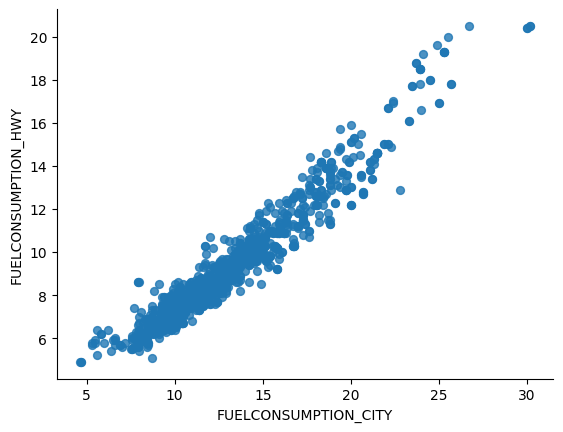

In [11]:
# @title FUELCONSUMPTION_CITY vs FUELCONSUMPTION_HWY

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_HWY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
# resumo dos dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


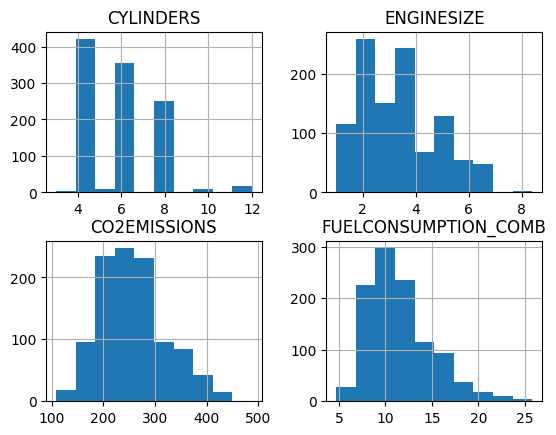

In [14]:
#plotar as variáveis selecionadas
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

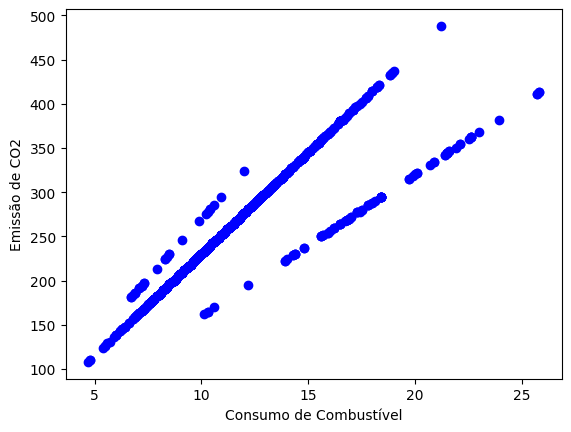

In [15]:
# apresentando graficamente cada uma das variáveis selecionada em relação à emissão de Co2, para explorar o tipo de relação
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Consumo de Combustível")
plt.ylabel("Emissão de CO2")
plt.show()

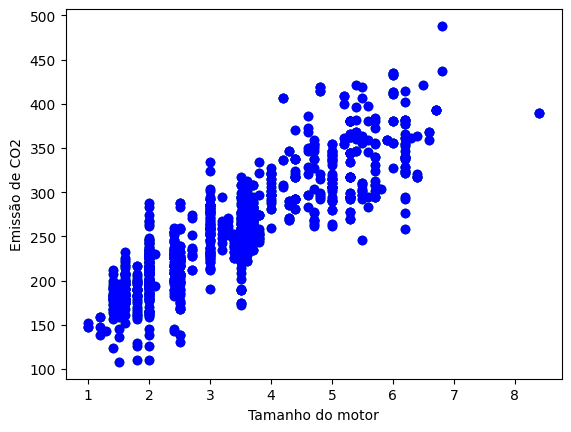

In [16]:
# Plota gráfico de correlação entre as variável depedente, Emissão de CO2, em relação a variável idependente, Tamanho do Motor
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissão de CO2")
plt.show()

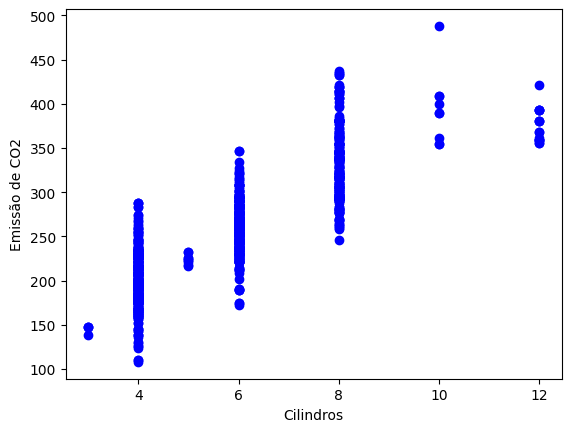

In [17]:
# gráfico das CILINDRADAS versus a Emissão CO2, para explorar o tipo de relação
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cilindros")
plt.ylabel("Emissão de CO2")
plt.show()

## **Modelando os conjuntos de dados de treinamento e teste**

A divisão Treino/Teste consiste em separar o conjunto de dados em dois subconjuntos mutuamente exclusivos: um para treinamento e outro para teste.

O modelo é treinado utilizando o conjunto de treinamento e posteriormente avaliado com o conjunto de teste. Essa abordagem permite obter uma avaliação mais precisa da performance do modelo em novos dados, pois o conjunto de teste é independente e não foi utilizado durante o treinamento.

Ao utilizar dados nunca vistos (conjunto de teste), podemos medir de maneira confiável a capacidade de generalização do modelo. Como o resultado de cada ponto de dados no conjunto de teste é conhecido, este método se mostra satisfatório para avaliar o modelo. Como esses dados não foram incluídos no treinamento, o modelo não possui informações prévias sobre eles, proporcionando assim uma avaliação fora da amostra genuína.

O conjunto de dados será dividido de forma que:

* 80% dos dados sejam utilizados para treinamento.
* 20% dos dados sejam reservados para teste.

Para realizar uma divisão confiável, uma máscara será criada para selecionar aleatoriamente linhas, utilizando-se a função `np.random.rand()` da biblioteca NumPy. Essa função permite uma seleção aleatória eficiente, garantindo que os dados sejam distribuídos de forma adequada entre os dois subconjuntos.

In [18]:
# Cria um conjunto de dados de treinamento (0.8) e teste (0.2), a função np.random.rand() seleciona linhas aleatórias
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## **Modelo de Regressão Simples**

A Regressão Linear ajusta um modelo linear com coeficientes B = (B1, ..., Bn) para minimizar a "soma dos quadrados dos resíduos" entre o valor real *y* no conjunto de dados e o valor previsto *ŷ* usando aproximação linear.

A regressão linear encontra a melhor linha reta (modelo linear) que representa a relação entre os dados, minimizando a diferença entre os valores reais e os valores previstos pela linha. Essa diferença é chamada de "resíduo", e a regressão linear busca minimizar a soma dos quadrados desses resíduos.

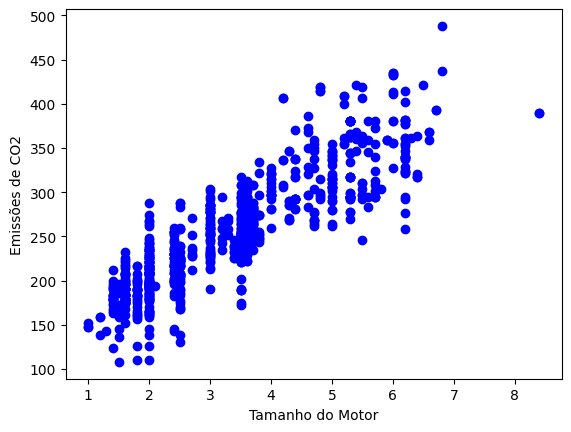

In [19]:
#Treina o modelo com base na distribuição dos dados
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissões de CO2")
plt.show()

In [20]:
# Utilizando a biblioteca Scikit-learn para modelar os dados
from sklearn import linear_model
regr = linear_model.LinearRegression()
# Definição da variável preditora (X) e a variável alvo (y)
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# Ajuste do modelo de regressão aos dados
regr.fit(train_x, train_y)
# Exibindo os coeficientes do modelo
print ('Coeficientes: ', regr.coef_)
print ('Intercepto: ',regr.intercept_)

Coeficientes:  [[39.00738216]]
Intercepto:  [125.08438849]


## **Encontrando a "Melhor Reta"**

A "melhor reta" é aquela que minimiza a distância entre os pontos de dados e a reta de regressão.

Matematicamente, a regressão linear simples modela a relação entre uma variável dependente (Y) e uma independente (X) através de uma equação linear: Y = θ<sub>0</sub> + θ<sub>1</sub>X, onde θ<sub>0</sub> é o intercepto e θ<sub>1</sub> é a inclinação da reta. O objetivo é encontrar os valores ótimos para θ<sub>0</sub> e θ<sub>1</sub> que minimizem o erro entre os valores previstos e os reais.

Matematicamente, isso se traduz em minimizar o Erro Quadrático Médio (MSE).  Existem métodos matemáticos e de otimização para encontrar essa reta, incluindo a minimização do MSE através do cálculo dos coeficientes θ<sub>0</sub> e θ<sub>1</sub>.

Numa regressão linear simples, o coeficiente e o intercepto são os parâmetros da linha de ajuste. O Scikit-learn percorre os dados e estima os parâmetros diretamente.

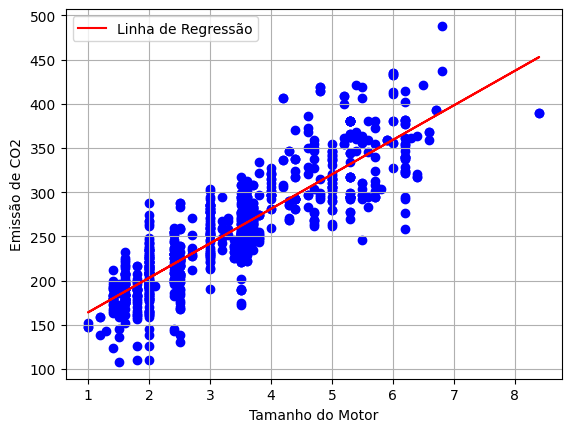

In [21]:
# Plota novamente o gráfico, traçando a linha de ajuste (de tendência) dos dados
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label="Linha de Regressão")
plt.grid()
plt.legend(loc="upper left")
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")

plt.show()

## **Métricas de Avaliação em Modelos de Regressão**

As métricas de avaliação medem o desempenho do modelo, comparando os valores previstos com os valores reais.

1. **Mean Absolute Error (MAE)**

  O Erro Médio Absoluto (MAE) é a média das diferenças absolutas entre os valores reais (𝑦<sub>𝑗</sub>) e os valores previstos (ŷ<sub>𝑗</sub>).

  Fórmula:

  $$ MAE = \frac{1}{n} \sum_{j=1}^{n} |y_j - \hat{y}_j| $$

  Indica o quão próximos os valores previstos estão dos valores reais em média. Sua escala é na mesma unidade dos dados de entrada. É robusto contra grandes erros individuais (outliers), pois não eleva o erro ao quadrado.


2. **Mean Squared Error (MSE)**

  O Erro Quadrático Médio (MSE) calcula a média dos quadrados das diferenças entre os valores reais e os valores previstos.

  Fórmula:

  $$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

  Penaliza erros maiores devido ao quadrado da diferença, tornando-o mais sensível a *outliers*.
Sua unidade está ao quadrado em relação aos dados de entrada. É muito usado em otimização de modelos pois é diferenciável e pode ser usado com gradientes.

3. **Relative Squared Error (RSE)**

  O Erro Quadrático Relativo é uma extensão do RAE, mas utiliza o quadrado das diferenças.

  Fórmula:

  $$ RSE = \frac{\sum_{j=1}^n (y_j - \bar{y})^2}{\sum_{j=1}^n (y_j - \hat{y}_j)^2} $$

  Mede quão próximo o modelo está da variância dos valores reais, fornecendo uma comparação direta com a variabilidade da média dos dados.

4. **Coeficiente de Determinação** ($R^2$)

  É uma métrica que indica a proporção da variância nos valores reais explicada pelo modelo.
  
  Fórmula: $$ R^2 = 1 - RSE $$

  Mede a proporção da variância explicada pelo modelo, quanto maior o $R^2$, melhor o ajuste do modelo. Intervalo: $R^2 \in (-\infty, 1]$

  * $R^2 = 1$: O modelo explica perfeitamente a variância.
  * $R^2 = 0$: O modelo não explica nenhuma variância além da média.
  * $R^2 < 0$: O modelo é pior que uma previsão simples (usando a média).









In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Erro Absoluto Médio (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Erro Quadrático Médio (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R-quadrado: %.2f" % r2_score(test_y , test_y_) )

Erro Absoluto Médio (MAE): 21.84
Erro Quadrático Médio (MSE): 806.16
R-quadrado: 0.78


In [23]:
# Treina o modelo de regressão linear usando o train_x e o train_y
train_x = train[["FUELCONSUMPTION_COMB"]]
test_x = test[["FUELCONSUMPTION_COMB"]]
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
# Encontra as previsões usando a função de previsão do modelo e os dados test_x
predictions = regr.predict(test_x)
# Calcula o valor do erro médio absoluto usando as funções np.mean e np.absolute
print("Erro Absoluto Médio (MAE): %.2f" % np.mean(np.absolute(predictions - test_y)))

Erro Absoluto Médio (MAE): 18.99


Coeficientes:  [[16.39678774]]
Intercepto:  [66.01182832]
Erro Absoluto Médio (MAE): 18.99
Erro Quadrático Médio (MSE): 748.25
R-quadrado: 0.80


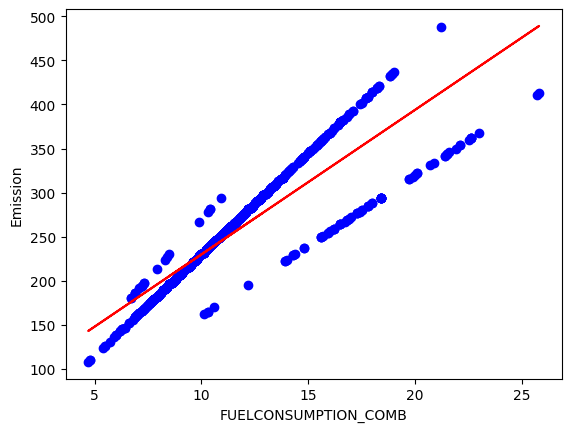

In [24]:
# Treina o modelo de regressão usando a variável/feature FUELCONSUMPTION_COMB e apresenta as métricas de avaliação

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
print ('Coeficientes: ', regr.coef_)
print ('Intercepto: ',regr.intercept_)

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Erro Absoluto Médio (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Erro Quadrático Médio (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R-quadrado: %.2f" % r2_score(test_y , test_y_) )

## **Referências**

GÉRON, A. **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems**. Canada: O’Reilly, 2023.